In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#  Load trained model

model_path = '/content/drive/MyDrive/vehicle_classification/vehicle_classifier_mobilenet.keras'
model = load_model(model_path)

#  Load class labels (based on training folders)
class_dir = '/content/drive/MyDrive/vehicle_classification/vehicle_classification_datasets/train'
class_labels = sorted(os.listdir(class_dir))

#  Prediction function
def predict_vehicle_image(img_path, model, class_labels, threshold=0.6):
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array, verbose=0)
    confidence = np.max(prediction)
    class_idx = np.argmax(prediction)

    if confidence < threshold:
        label = "Unknown Vehicle"
    else:
        label = f"{class_labels[class_idx]} ({confidence*100:.1f}%)"

    #  Show result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}")
    plt.show()
    return label


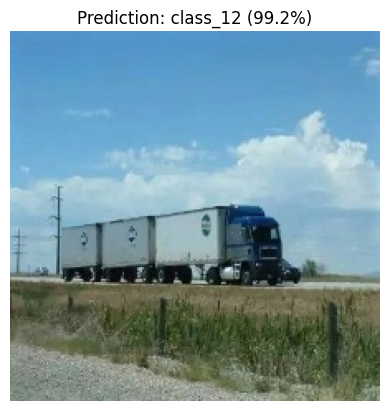

'class_12 (99.2%)'

In [3]:
predict_vehicle_image('/content/drive/MyDrive/vehicle_classification/vehicle_classification_datasets/test/class_12/adidnauman-tripleroadtrain-001.jpeg', model, class_labels)


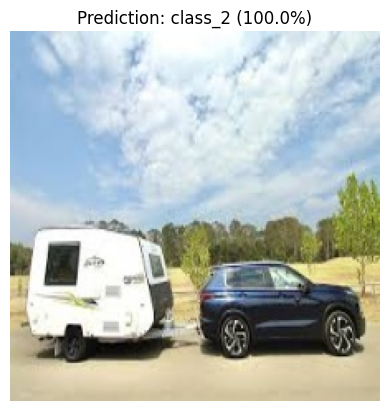

'class_2 (100.0%)'

In [4]:
predict_vehicle_image('/content/drive/MyDrive/vehicle_classification/processed_images/class_2/qasimzia-caravan-196.jpg', model, class_labels)


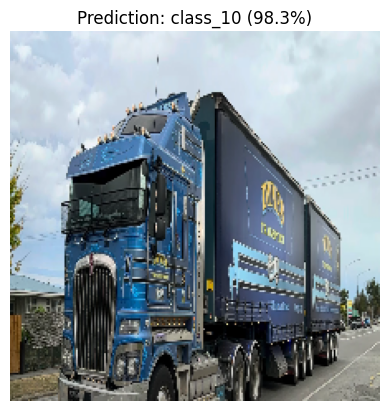

'class_10 (98.3%)'

In [ ]:
predict_vehicle_image('/content/drive/MyDrive/vehicle_classification/vehicle_classification_datasets/test/class_10/class_10_0048.png', model, class_labels)


In [ ]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.8/974.8 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 44.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
video_path = '/content/drive/MyDrive/vehicle_classification/test.mp4'

model_path = '/content/drive/MyDrive/vehicle_classification/vehicle_classifier_mobilenet.keras'
output_path = '/content/drive/MyDrive/vehicle_classification/Annotated_Accident_Video.mp4'
class_labels = sorted(os.listdir('/content/drive/MyDrive/vehicle_classification/vehicle_classification_datasets/train'))

In [ ]:
yolo_model = YOLO('yolov8n.pt')  # or yolov8s.pt for better accuracy
classifier = load_model(model_path)

In [ ]:
cap = cv2.VideoCapture(video_path)
frame_count = 0

frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

#  Output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    #  YOLO detection
    results = yolo_model(frame, classes=[2, 3, 5, 7])  # car, motorcycle, bus, truck (COCO IDs)
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
            crop = frame[y1:y2, x1:x2]

            try:
                crop_resized = cv2.resize(crop, (224, 224))
                img_array = img_to_array(crop_resized) / 255.0
                img_array = np.expand_dims(img_array, axis=0)

                prediction = classifier.predict(img_array, verbose=0)
                confidence = np.max(prediction)
                class_idx = np.argmax(prediction)

                if confidence < 0.6:
                    label = "Unknown Vehicle"
                else:
                    label = f"{class_labels[class_idx]} ({confidence*100:.1f}%)"

                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

            except Exception as e:
                print(f"Skipping frame due to error: {e}")
            frame_count += 1


    out.write(frame)
print(f" Total frames processed: {frame_count}")


cap.release()
out.release()
print(" Annotated video saved to:", output_path)


0: 416x640 3 cars, 225.4ms
Speed: 7.4ms preprocess, 225.4ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 3 cars, 185.0ms
Speed: 18.2ms preprocess, 185.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 3 cars, 143.9ms
Speed: 4.2ms preprocess, 143.9ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 4 cars, 129.8ms
Speed: 4.1ms preprocess, 129.8ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 4 cars, 191.1ms
Speed: 13.1ms preprocess, 191.1ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 4 cars, 131.9ms
Speed: 5.2ms preprocess, 131.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 4 cars, 124.3ms
Speed: 3.7ms preprocess, 124.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)

0: 416x640 4 cars, 125.4ms
Speed: 4.5ms preprocess, 125.4ms inference, 1.3ms postprocess per image at shape (1, 3, 

In [ ]:
!pip install git+https://github.com/ultralytics/ultralytics.git@main


  Cloning https://github.com/ultralytics/ultralytics.git (to revision main) to /tmp/pip-req-build-q43aq9lg
  Running command git clone --filter=blob:none --quiet https://github.com/ultralytics/ultralytics.git /tmp/pip-req-build-q43aq9lg
  Resolved https://github.com/ultralytics/ultralytics.git to commit fba1b3f513da0aafc2d821eb4475f4ac5d8a238c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install deep_sort_realtime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 38.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO               # your YOLOv8 detector
from deep_sort_realtime.deepsort_tracker import DeepSort

# load detector
yolo_model = YOLO('yolov8n.pt')

# init Deep SORT tracker
tracker = DeepSort(max_age=30, n_init=2, nms_max_overlap=1.0)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 55.1MB/s]
